In [1]:
import pandas as pd
import numpy as np
import re          #regular expression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
data["Language"].nunique()

17

There are 17 languages in dataset.

In [6]:
#Separating Independent and Dependent features
X = data["Text"]
y = data["Language"]

#Label Encoding to convert it into a numerical form
#For example, English as 3.. similarily all languages are given a unique label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [8]:
data_list = []

# iterating through all the text
for text in X:         
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
    text = re.sub(r'[[]]', ' ', text)   
    text = text.lower()          # converting the text to lower case
    data_list.append(text)       # appending to data_list

In [9]:
#Bag of Words [ converting text into numerical form by creating a Bag of Words model using CountVectorizer.]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # tokenize a collection of text documents
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

As the model can't understand textual data, all the data is sent in numerical format to the model after preprocessing data(removing symbols, spaces).
The textual data need to be vectorized.

Countvectorizer Tokenization(Tokenization Means Breaking Down A Sentence Into Words By Performing Preprocessing Tasks Like Converting All Words To Lowercase, Removing Special Characters, Etc.

Bag of Words(BOW) model represents text that describes the occurence of words within a document. It follows binary representation. 1 for frequent occurence of a word and 0 if word is not occuring

In [10]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [11]:
# Model Training
from sklearn.naive_bayes import MultinomialNB  #classifier is suitable for classification with discrete features
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

In [12]:
#predict output for test dataset
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [14]:
print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


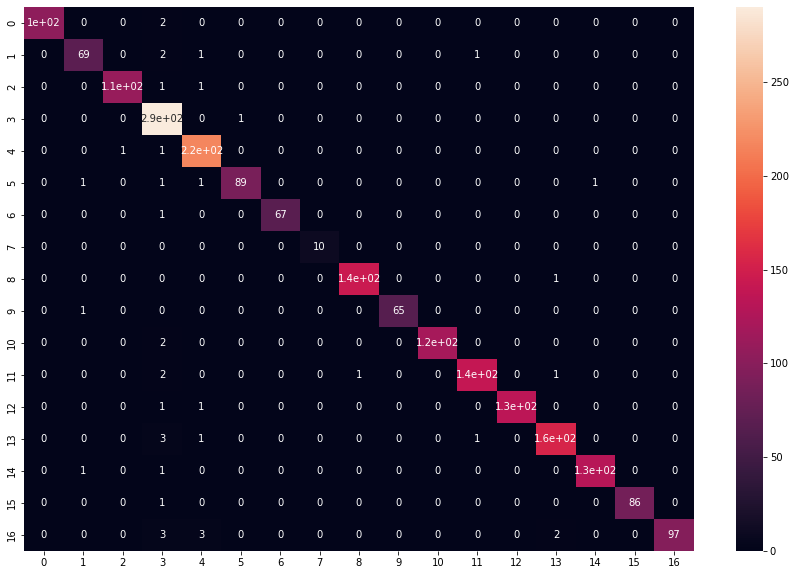

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [16]:
#Predicting with some more data

def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [17]:
predict('People are awesome')

The langauge is in English


In [18]:
predict('നൽകുന്നു')

The langauge is in Malayalam


In [19]:
predict('अरे आप कैसे हैं')

The langauge is in Hindi


In [21]:
predict('Bugün nasılsın') #turkish

The langauge is in English


In [22]:
predict('ನೀವು ಇಂದು ಹೇಗಿದ್ದೀರಿ')

The langauge is in English


As the above model is not predicting the right languages based on text, we will try a different model.

# Using FastText

In [3]:
pip install fasttext

Defaulting to user installation because normal site-packages is not writeable
  Using cached fasttext-0.9.2.tar.gz (68 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\programdata\anaconda3\lib\site-packages (from fasttext) (1.21.5)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-win_amd64.whl size=227412 sha256=32b53bf33c30e7e374d02ba992dc06a31c14f7bc45ac5ce1ab35e91c70300aa8

  Stored in directory: c:\users\asjas\appdata\local\pip\cache\wheels\64\57\bc\1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [7]:
import fasttext as ft

FastText is an open-source and lightweight library developed by Facebook AI Research. It efficiently handles large datasets, allowing for the classification of billions of words in milliseconds. 

FastText also provides pre-trained word vectors for 157 languages, allowing for transfer learning and quick integration into NLP models. With its user-friendly interface and high performance, FastText has become a popular choice for NLP tasks such as sentiment analysis, spam filtering, and language identification.

There are several reasons why FastText is fast while maintaining performance. Some of them are:

- It is implemented in C++
- It allows you to use multiprocessing during training
- Based on a simple neural network architecture

In [10]:
model = ft.load_model('lid.176.ftz')
#lid.176.ftz: A model trained on text of 176 different languages. 
#This is the most common pre-trained model available for language detection.

In [11]:
language = model.predict('This is a sentence in English')
# Print predicted language
print(language)

(('__label__en',), array([0.96859217]))


af – Afrikaans	lv – Latvian	ho – Hiri Motu
am – Amharic	mg – Malagasy	hz – Herero
an – Aragonese	mi – Maori	ii – Sichuan Yi
ar – Arabic	mk – Macedonian	inh – Ingush
as – Assamese	ml – Malayalam	jbo – Lojban
az – Azerbaijani	mn – Mongolian	kl – Kalaallisut
be – Belarusian	mr – Marathi	ks – Kashmiri
bg – Bulgarian	ms – Malay	ku-Latn – Central Kurdish (Latin)
bn – Bengali	mt – Maltese	kv – Komi
br – Breton	my – Burmese	lb – Luxembourgish
bs – Bosnian	ne – Nepali	lg – Ganda
ca – Catalan	nl – Dutch	mh – Marshallese
ceb – Cebuano	no – Norwegian	mi – Māori
co – Corsican	ny – Chichewa	mrj – Hill Mari
cs – Czech	pa – Punjabi	nah – Nahuatl
cy – Welsh	pl – Polish	nap – Neapolitan
da – Danish	pt – Portuguese	nb – Norwegian Bokmål
de – German	ro – Romanian	nn – Norwegian Nynorsk
el – Greek	ru – Russian	no – Norwegian
en – English	sd – Sindhi	oc – Occitan
eo – Esperanto	si – Sinhala	os – Ossetian
es – Spanish	sk – Slovak	pi – Pali
et – Estonian	sl – Slovenian	ps – Pashto
eu – Basque	sm – Samoan	qu – Quechua
fa – Persian	sn – Shona	rm – Romansh
fi – Finnish	so – Somali	rn – Rundi
fr – French	sq – Albanian	rw – Kinyarwanda
fy – Western Frisian	sr – Serbian	sc – Sardinian
ga – Irish	st – Sotho	se – Northern Sami
gd – Scottish Gaelic	su – Sundanese	sg – Sango
gl – Galician	sv – Swedish	tk – Turkmen
gu – Gujarati	sw – Swahili	tlh – Klingon
ha – Hausa	ta – Tamil	tn – Tswana
haw – Hawaiian	te – Telugu	to – Tongan
hi – Hindi	tg – Tajik	tw – Twi
hmn – Hmong	th – Thai	ty – Tahitian
hr – Croatian	tl – Tagalog	ug – Uighur
ht – Haitian Creole	tr – Turkish	ve – Venda
hu – Hungarian	uk – Ukrainian	vo – Volapük
hy – Armenian	ur – Urdu	wa – Walloon
id – Indonesian	uz – Uzbek	wo – Wolof
ig – Igbo	vi – Vietnamese	xog – Soga
is – Icelandic	xh – Xhosa	yue – Cantonese
it – Italian	yi – Yiddish	za – Zhuang
iw – Hebrew	yo – Yoruba	ace – Acehnese
ja – Japanese	zh – Chinese	ach – Akan
jw – Javanese	zu – Zulu	ady – Adyghe
ka – Georgian	ak – Akan	aln – Gheg Albanian
kk – Kazakh	bh – Bihari	alt – Southern Altai
km – Khmer	bi – Bislama	anp – Angika
kn – Kannada	bm – Bambara	arn – Mapudungun
ko – Korean	chr – Cherokee	arq – Algerian Arabic
ku – Kurdish	dv – Divehi	ast – Asturian
ky – Kyrgyz	dz – Dzongkha	av – Avar
la – Latin	ee – Ewe	azb – South Azerbaijani
lb – Luxembourgish	ff – Fulah	ba – Bashkir
lo – Lao	gv – Manx	bar – Bavarian
lt – Lithuanian	hak – Hakka Chinese	bbc – Batak Toba
bcl – Central Bicolano	be-tarask – Belarusian (Taraškievica)	

In [13]:
model.predict('Bugün nasılsın')

(('__label__tr',), array([0.98389137]))

In [14]:
model.predict('ನೀವು ಇಂದು ಹೇಗಿದ್ದೀರಿ')

(('__label__kn',), array([0.99934846]))